In [ ]:
import pandas as pd
import math as m
from sklearn.cluster import KMeans 
from sklearn import metrics 
from scipy.spatial.distance import cdist 
import numpy as np 
import matplotlib.pyplot as plt  

##6.1

In [ ]:
df=pd.DataFrame()
df1 = pd.read_csv("ASHOKA.csv")
df['s1'] = df1[df1['Series'] == 'EQ']['Close Price']
df1 = pd.read_csv("BAJAJELEC.csv")
df['s2'] = df1[df1['Series'] == 'EQ']['Close Price']
df1 = pd.read_csv("BOMDYEING.csv")
df['s3'] = df1[df1['Series'] == 'EQ']['Close Price']
df1 = pd.read_csv("CENTURYPLY.csv")
df['s4'] = df1[df1['Series'] == 'EQ']['Close Price']
df1 = pd.read_csv("FORTIS.csv")
df['s5'] = df1[df1['Series'] == 'EQ']['Close Price']
df1 = pd.read_csv("GUJALKALI.csv")
df['s6'] = df1[df1['Series'] == 'EQ']['Close Price']
df1 = pd.read_csv("IDFC.csv")
df['s7'] = df1[df1['Series'] == 'EQ']['Close Price']
df1 = pd.read_csv("IRCON.csv")
df['s8'] = df1[df1['Series'] == 'EQ']['Close Price']
df1 = pd.read_csv("ITDC.csv")
df['s9'] = df1[df1['Series'] == 'EQ']['Close Price']
df1 = pd.read_csv("JETAIRWAYS.csv")
df['s10'] = df1[df1['Series'] == 'EQ']['Close Price']


In [ ]:
df1 = pd.read_csv("ADANIPOWER.csv")
df['m1'] = df1[df1['Series'] == 'EQ']['Close Price']

df1 = pd.read_csv("AJANTPHARM.csv")
df['m2'] = df1[df1['Series'] == 'EQ']['Close Price']

df1 = pd.read_csv("AMARAJABAT.csv")
df['m3'] = df1[df1['Series'] == 'EQ']['Close Price']

df1 = pd.read_csv("APOLLOTYRE.csv")
df['m4'] = df1[df1['Series'] == 'EQ']['Close Price']

df1 = pd.read_csv("BERGEPAINT.csv")
df['m5'] = df1[df1['Series'] == 'EQ']['Close Price']

df1 = pd.read_csv("CASTROLIND.csv")
df['m6'] = df1[df1['Series'] == 'EQ']['Close Price']

df1 = pd.read_csv("CUMMINSIND.csv")
df['m7'] = df1[df1['Series'] == 'EQ']['Close Price']

df1 = pd.read_csv("DHFL.csv")
df['m8'] = df1[df1['Series'] == 'EQ']['Close Price']

df1 = pd.read_csv("EXIDEIND.csv")
df['m9'] = df1[df1['Series'] == 'EQ']['Close Price']

df1 = pd.read_csv("GMRINFRA.csv")
df['m10'] = df1[df1['Series'] == 'EQ']['Close Price']



In [ ]:
df1 = pd.read_csv("ADANIPORTS.csv")
df['l1'] = df1[df1['Series'] == 'EQ']['Close Price']
df1 = pd.read_csv("ASIANPAINT.csv")
df['l2'] = df1[df1['Series'] == 'EQ']['Close Price']
df1 = pd.read_csv("AXISBANK.csv")
df['l3'] = df1[df1['Series'] == 'EQ']['Close Price']
df1 = pd.read_csv("BAJFINANCE.csv")
df['l4'] = df1[df1['Series'] == 'EQ']['Close Price']
df1 = pd.read_csv("BPCL.csv")
df['l5'] = df1[df1['Series'] == 'EQ']['Close Price']
df1 = pd.read_csv("CIPLA.csv")
df['l6'] = df1[df1['Series'] == 'EQ']['Close Price']
df1 = pd.read_csv("DRREDDY.csv")
df['l7'] = df1[df1['Series'] == 'EQ']['Close Price']
df1 = pd.read_csv("EICHERMOT.csv")
df['l8'] = df1[df1['Series'] == 'EQ']['Close Price']
df1 = pd.read_csv("GAIL.csv")
df['l9'] = df1[df1['Series'] == 'EQ']['Close Price']
df1 = pd.read_csv("HDFC.csv")
df['l10'] = df1[df1['Series'] == 'EQ']['Close Price']


##6.2

In [ ]:
dr=df[:249].pct_change().fillna(0).mean()*252 # annual percentage returns
dsr=df[:249].pct_change().fillna(0).std()*m.sqrt(252) # volatility

##6.3

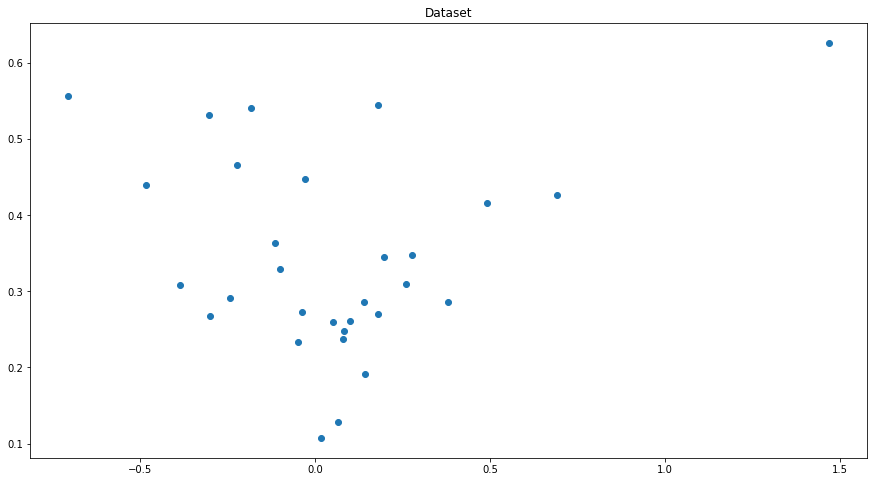

In [ ]:
x1 = dr 
x2 = dsr 
X = np.array(list(zip(x1, x2))).reshape(len(x1), 2) 
  
#Visualizing the data 
plt.figure(figsize=(15,8))
plt.plot() 

plt.title('Dataset') 
plt.scatter(x1, x2) 
plt.show() 

In [ ]:
distortions = [] 
inertias = [] 
mapping1 = {} 
mapping2 = {} 
K = range(1,10) 
  
for k in K: 
    #Building and fitting the model 
    kmeanModel = KMeans(n_clusters=k).fit(X) 
    kmeanModel.fit(X)     
      
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 
                      'euclidean'),axis=1)) / X.shape[0]) 
    inertias.append(kmeanModel.inertia_) 
  
    mapping1[k] = sum(np.min(cdist(X, kmeanModel.cluster_centers_, 
                 'euclidean'),axis=1)) / X.shape[0] 
    mapping2[k] = kmeanModel.inertia_ 

1 : 0.30416955008905294
2 : 0.2583568613306929
3 : 0.17119907296867157
4 : 0.1381954225648046
5 : 0.1191356339552408
6 : 0.10231486308186404
7 : 0.0934713893797715
8 : 0.07637595269027453
9 : 0.06726559103439272


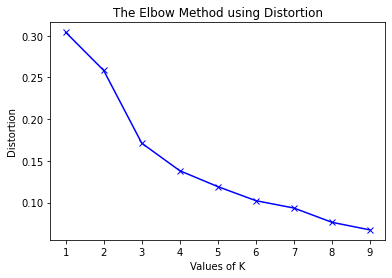

In [ ]:
for key,val in mapping1.items(): 
    print(str(key)+' : '+str(val))
plt.plot(K, distortions, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Distortion') 
plt.title('The Elbow Method using Distortion') 
plt.show() 

1 : 4.964195316389609
2 : 2.6455506863851705
3 : 1.2625532622753723
4 : 0.7637288279215316
5 : 0.5594752126661063
6 : 0.4175108467086598
7 : 0.3179238785438132
8 : 0.23153007201372697
9 : 0.18819259980852585


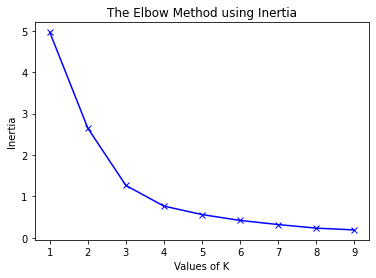

In [ ]:
for key,val in mapping2.items(): 
    print(str(key)+' : '+str(val)) 
plt.plot(K, inertias, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Inertia') 
plt.title('The Elbow Method using Inertia') 
plt.show() 

In [ ]:
# From elbow nethod we can say that the best value of k is 4

kmeanModel = KMeans(n_clusters=4).fit(X) 
kmeanModel.fit(X)
print(kmeanModel.cluster_centers_)

[[-0.35284312  0.42556016]
 [ 0.35400208  0.38226927]
 [ 1.46808943  0.62678106]
 [ 0.03775543  0.25967013]]


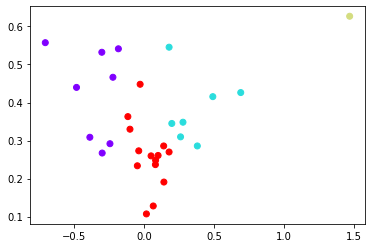

In [ ]:
plt.scatter(X[:,0],X[:,1], c=kmeanModel.labels_, cmap='rainbow')

##6.4

In [ ]:
dfn = pd.DataFrame()
dfn['name'] = dr.index
dfn['cluster'] = kmeanModel.predict(X)
print(dfn)

   name  cluster
0    s1        1
1    s2        1
2    s3        2
3    s4        1
4    s5        0
5    s6        1
6    s7        3
7    s8        3
8    s9        0
9   s10        3
10   m1        0
11   m2        0
12   m3        3
13   m4        1
14   m5        3
15   m6        0
16   m7        0
17   m8        3
18   m9        3
19  m10        1
20   l1        3
21   l2        3
22   l3        3
23   l4        1
24   l5        0
25   l6        3
26   l7        0
27   l8        3
28   l9        3
29  l10        3
